In [39]:
import torch
import torch.nn as nn
import numpy as np
import math

torch.set_printoptions(precision=3)

### Layer Normalization
***

Table of Contents:
1. **`What is Layer Normalization`**
2. **`Why do we use Layer Normalization`**
3. **`Understanding Layer Normalization Formula`**
4. **`Implementation of Layer Normalization From Scratch`**
5. **`PyTorch Implementation of Layer Normalization`**

#### 1. What is Layer Normalization
***
- A technique used in deep learning to normalize the activations of each layer independently.
- Unlike batch normalization, which normalizes across the entire batch, layer normalization normalizes across the features or channels within each data sample.

#### 2. Why do we use Layer Normalization
***
- Primarily used to deal with ICS (Internal Covariate Shift)
- Allows the weight's distribution to be the same, resulting in faster training
- Similar to How Batch Normalization is used to normalize batches in CNN models

In [2]:
# Creating the data with dimension [5 (Batch Size), 10 (Channels), 20 (Height), 5 (Width)]

data = torch.randint(0, 100, size=(5, 10, 15, 20))
C, H, W = data.size()[1:]

#### 3. Understanding Layer Normalization Formula
***
- Implements Z-score normalization
- Afterwards, adds some form of shifting and scaling to make sure all the distribution curves are similar
- That is why $\beta$ and $\gamma$ are learnable parameters

<img src=attachment:62f64099-79cf-4407-a0ca-d2c8b41ee566.png width=400>

1. Z-Score Normalization
- The Normalization component of the Layer Normalization is very similar to that of Z-Score
- However instead of the standard deviation, we have the variance $\sigma^2$

<img src=attachment:b0d4b0ef-88e1-44ba-a54c-7f0612011a85.png width=300>
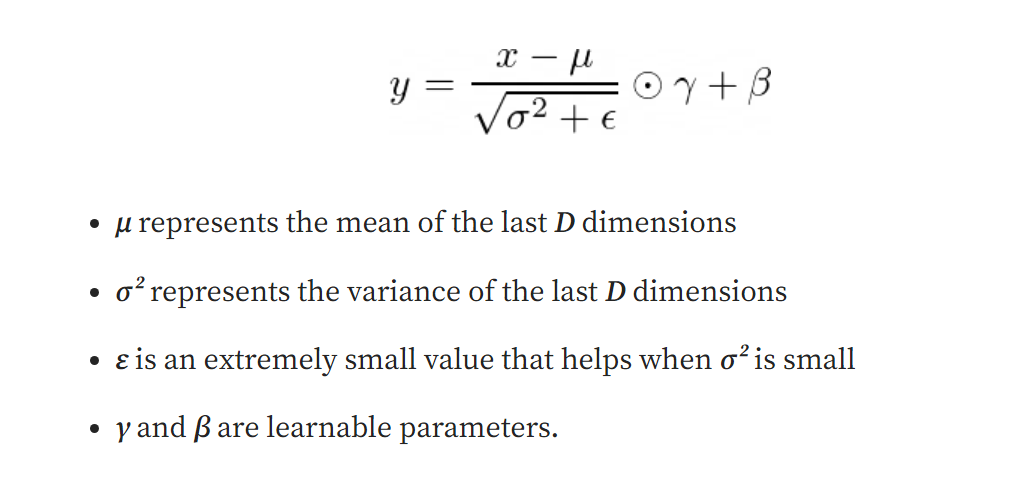
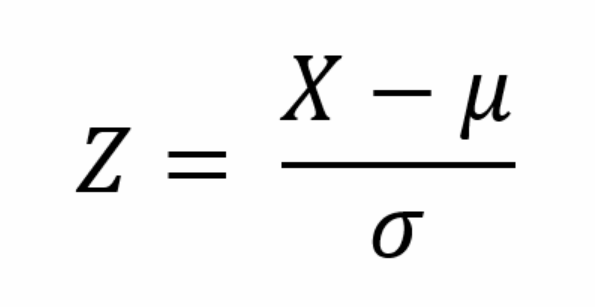

#### 4. Implementation of Layer Normalization From Scratch
***

In [52]:
# Creating "Gamma" / Weights
gamma = torch.ones((5,6))

# Creating "Beta" / Biases
beta = torch.zeros((5,6))

# Epsilon Constant (10 ^ (-5))
eps = 1e-5

# Sets the seed for replication purposes
torch.manual_seed(42)

# Create our Random Embedding Data
embedding = torch.randint(0, 100, size=(4,5,6))
embedding = embedding.to(torch.float64)

# Find the Mean of our Embedding Data last dimension
mean = embedding.mean(-1, keepdims=True)

# Find the Variance of our Embedding last Dimension
var = embedding.var(-1, keepdims=True, unbiased=True)

# Implementing Layer Normalization
embed_norm = (embedding - mean) / torch.sqrt(var + eps)
embed_layer_norm = embed_norm * gamma + beta

In [47]:
class LayerNorm(nn.Module):
    def __init__(self, shape:list, eps:int=1e-5):
        super().__init__()

        self.shape = shape

        # Declaring the Gamma / Weights (Initiliazed with ones)
        self.G = nn.Parameter(torch.ones(shape))

        # Declaring the Beta / Biases (Initialized with ones)
        self.B = nn.Parameter(torch.zeros(shape))

        # Declaring epsilon (small constant to prevent division of 0)
        self.epsilon = eps

    def forward(self, X):
        X_m = X.mean(dim=-1, keepdims=True)
        X_v = X.var(dim=-1, keepdims=True, unbiased=True)

        return self.G * (X - X_m) / (torch.sqrt(X_v + self.epsilon)) + self.B 

#### 5. PyTorch Layer Normalization
***

In [54]:
torch.manual_seed(42)

imgs = torch.rand(3,4,5)
_, H, W = imgs.size()

layer_norm = nn.LayerNorm([H,W])
print(f"PyTorch Result: \n{layer_norm(imgs)}")
print(f"PyTorch LayerNorm Dimensions: {layer_norm(imgs).size()}")
print("\n" + "-"*75 + "\n")

gamma = torch.ones([H,W])
beta = torch.zeros([H,W])
eps = 1e-05

img_mean = imgs.mean(dim=(-1, -2), keepdims=True)
img_var = imgs.var(dim=(-1, -2), keepdims=True, unbiased=True)

# img_mean = imgs.mean()
# img_var = imgs.var()

imgs_norm = (imgs - img_mean) / torch.sqrt(img_var + eps) 
imgs_layer_norm = imgs_norm * gamma + beta

# pretty close results 
print(f"Scratch Result: \n{imgs_layer_norm}")
print(f"Scratch LayerNorm Dimensions: {imgs_layer_norm.size()}")


PyTorch Result: 
tensor([[[ 0.965,  1.094, -1.002,  1.268, -0.972],
         [-0.143, -1.499,  0.616,  1.195, -1.985],
         [ 1.171, -0.172,  0.914, -0.274,  0.409],
         [-0.818,  0.978, -0.249, -1.459, -0.038]],

        [[-0.697, -0.092, -0.601,  1.284, -1.276],
         [-0.697, -0.382, -0.944,  0.281, -1.625],
         [ 1.706, -1.381,  1.475,  0.408, -0.457],
         [ 1.204,  0.389,  1.538,  0.308, -0.441]],

        [[ 0.313, -0.647,  0.583,  1.422,  0.862],
         [-0.942,  0.861,  0.153,  0.738, -1.248],
         [-1.924, -0.852, -1.528,  1.293,  0.347],
         [ 0.571,  0.397, -0.196,  1.226, -1.428]]],
       grad_fn=<NativeLayerNormBackward0>)
PyTorch LayerNorm Dimensions: torch.Size([3, 4, 5])

---------------------------------------------------------------------------

Scratch Result: 
tensor([[[ 0.941,  1.066, -0.976,  1.236, -0.947],
         [-0.139, -1.461,  0.600,  1.165, -1.935],
         [ 1.141, -0.167,  0.891, -0.267,  0.399],
         [-0.798,  0.9